# Data Preprocessing

Import data from the GLUE cola dataset, shuffle, and remove the undesirable sentences (those which are labelled to be ungrammatical).

In [2]:
import pandas as pd
from sklearn.utils import shuffle

# Read the first 100 lines of cola.tsv into a DataFrame
df = pd.read_csv('cola.tsv', sep='\t')

# Shuffle the DataFrame
df = df.head(1000)

df.columns = ['model', 'label', 'blank', 'text']

new_df = df[['text', 'label']].copy()

print("Number of entries:", len(new_df))

filtered_df = new_df[new_df['label'] == 1].copy()

filtered_df.head()
print("Number of grammatical entries:", len(filtered_df))



Number of entries: 1000
Number of grammatical entries: 645


# Embeddings Generation – OS Model

In [38]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

In [39]:
text_array = filtered_df['text'].values
print(text_array[0:5])

["One more pseudo generalization and I'm giving up."
 "One more pseudo generalization or I'm giving up."
 'The more we study verbs, the crazier they get.'
 'Day by day the facts are getting murkier.' "I'll fix you a drink."]


In [40]:
embeddings = model.encode(text_array)
print("embedding count: ", len(embeddings))
print("embedding dimension: ", len(embeddings[0]))

embedding count:  645
embedding dimension:  768


# Optional PCA Visualization

Can help to verify diversity of dataset. If a single principle axis explains most variance, embeddings model probably very rudimentary or dataset is probably too biased. In this case, used as a sanity check.

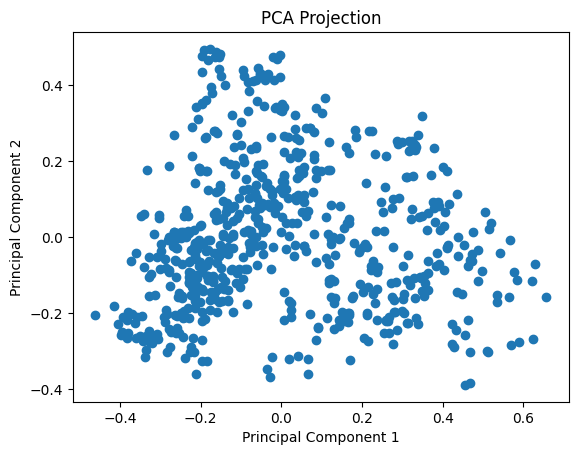

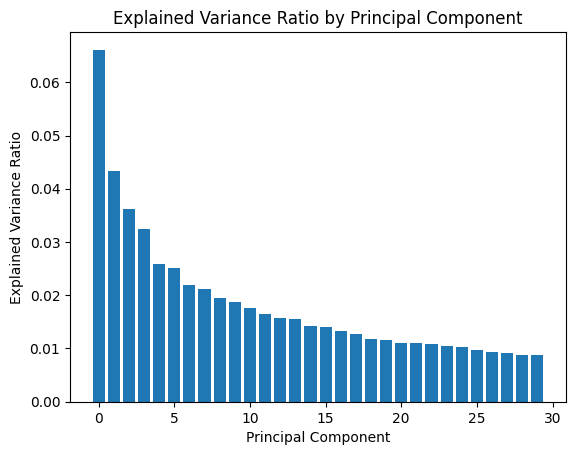

In [41]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = embeddings

# Create an instance of PCA with 2 components
pca = PCA(n_components=30)

# Fit the data and transform it to the 2D space
transformed_data = pca.fit_transform(data)

# Plot the transformed data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Save OS Embeddings to Disk

In [42]:
np.save('OSembeddings.npy', embeddings)